## **Binary Search**

`🔄` -> Revison ,

`✨` -> Important ,

`🔥` -> Tricky Question ,

`⭐` -> Most IMP ,

`🆕` -> New concept


### `1.` BS on 1D array

#### `1.1` find the target

In [4]:
class Solution(object):
    def binarySearch(self, nums, low, high, target):
        if low > high:
            return -1  # Base case
        
        mid = (low + high) // 2
        if nums[mid] == target:
            return mid
        elif target > nums[mid]:
            return self.binarySearch(nums, mid + 1, high, target)
        return self.binarySearch(nums, low, mid - 1, target)

    def search(self, nums, target):
        return self.binarySearch(nums, 0, len(nums) - 1, target)



#### `1.2` Implement Lower Bound

In [ ]:
class Solution:
    def findCeil(self,arr,k):
        left,right=0,len(arr)-1
        ceil=-1
        while left<=right:
            mid=(left+right)//2

            if arr[mid]>=k:
                ceil=mid
                right=mid-1
            else:
                left=mid+1
        return ceil



#### `1.3` Implement upper Bound

In [ ]:
class Solution:
    def findFloor(self, arr, k):
        left, right = 0, len(arr) - 1
        floor = -1  
        
        while left <= right:
            mid = (left + right) // 2

            if arr[mid] <= k:  
                floor = mid
                left = mid + 1  
            else:
                right = mid - 1  
        
        return floor  

#### `1.4` Both Ceil and floor
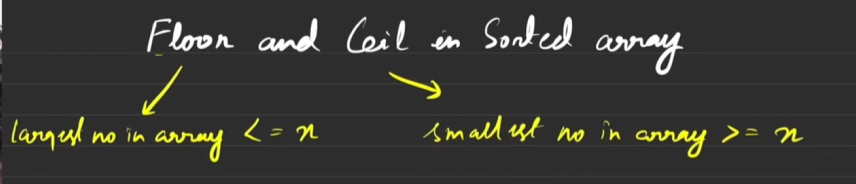

# Thought Process Behind Using the `diff` Variable for Floor and Ceil

The thought process behind using the `diff` (difference) variable to maintain the condition for finding the floor and ceil values is based on ensuring that we keep track of the closest values to the target `x` while iterating over the array. Let me explain the rationale behind using the differences and why they help maintain the correct floor and ceil.

## Goal:
We are trying to find two things:
1. **Floor of x**: The largest element in the array that is less than or equal to `x`.
2. **Ceil of x**: The smallest element in the array that is greater than or equal to `x`.

## Thought Process:
We want to compare each element of the array to `x` and check if the current element could potentially be a better match for floor or ceil than the previous candidates. To do this efficiently, we track how close the element is to `x` using the **difference** between the element and `x`.

## Why Use the Difference (`diff`)?

### **Floor Condition:**
For each element `num` in the array:
- If `num` is **less than or equal to** `x`, it can potentially be the **floor** of `x`.
- The idea is to find the element that is closest to `x` **without exceeding it**.
- We maintain a variable `floor_diff` that stores the **smallest difference** between `x` and a potential floor element. By doing so, we can always compare if the current element is closer to `x` than the previous floor candidate.

#### Why is this helpful?
- If we encounter a number `num` that is smaller than or equal to `x`, we calculate the difference `x - num`.
- If this new difference is **smaller** than the previous `floor_diff`, it means this number is closer to `x` than the previous floor candidate, and we update the floor value.

### **Ceiling Condition:**
For each element `num` in the array:
- If `num` is **greater than or equal to** `x`, it can potentially be the **ceil** of `x`.
- We want to find the smallest element that is **greater than or equal to** `x`.
- We maintain a variable `ceil_diff` that stores the **smallest difference** between `num` and `x`. This helps us keep track of the closest number to `x` while ensuring it is greater than or equal to `x`.

#### Why is this helpful?
- If `num` is greater than or equal to `x`, we calculate the difference `num - x`.
- If this new difference is **smaller** than the previous `ceil_diff`, it means this number is closer to `x` than the previous ceil candidate, and we update the ceil value.

## Detailed Explanation of the Logic:
- Initially, `floor_val` and `ceil_val` are set to `-1`, representing the absence of any valid floor or ceil.
- The `floor_diff` and `ceil_diff` are initialized to `float('inf')` (infinity), which acts as a placeholder for an infinitely large difference. This ensures that any valid candidate will be smaller than these initial values.

## How the Difference Helps Maintain the Conditions:
As we iterate over the array:
- **For floor**: If the current number `num` is less than or equal to `x`, we calculate `x - num`. If this difference is smaller than the current `floor_diff`, it means this `num` is closer to `x` and should be considered the new floor.
- **For ceil**: If the current number `num` is greater than or equal to `x`, we calculate `num - x`. If this difference is smaller than the current `ceil_diff`, it means this `num` is closer to `x` and should be considered the new ceil.

## Dry Run Example with Thought Process:
Let's take the example where `x = 6` and `arr = [2, 3, 5, 7, 8, 11, 12]`.

### Step-by-step dry run:

- **Iteration 1 (num = 2):**
  - **Ceil Condition**: `2 >= 6` is **false**, so we don't update the `ceil_val`.
  - **Floor Condition**: `2 <= 6` is **true**. The difference `6 - 2 = 4`. Since `floor_diff = inf` initially, we update `floor_val = 2` and `floor_diff = 4`.

- **Iteration 2 (num = 3):**
  - **Ceil Condition**: `3 >= 6` is **false**, so we don't update the `ceil_val`.
  - **Floor Condition**: `3 <= 6` is **true**. The difference `6 - 3 = 3`. Since `floor_diff = 4`, and `3 < 4`, we update `floor_val = 3` and `floor_diff = 3`.

- **Iteration 3 (num = 5):**
  - **Ceil Condition**: `5 >= 6` is **false**, so we don't update the `ceil_val`.
  - **Floor Condition**: `5 <= 6` is **true**. The difference `6 - 5 = 1`. Since `floor_diff = 3`, and `1 < 3`, we update `floor_val = 5` and `floor_diff = 1`.

- **Iteration 4 (num = 7):**
  - **Ceil Condition**: `7 >= 6` is **true**. The difference `7 - 6 = 1`. Since `ceil_diff = inf`, we update `ceil_val = 7` and `ceil_diff = 1`.
  - **Floor Condition**: `7 <= 6` is **false**, so we don't update the `floor_val`.

- **Iteration 5 (num = 8):**
  - **Ceil Condition**: `8 >= 6` is **true**. The difference `8 - 6 = 2`. Since `ceil_diff = 1`, and `2 > 1`, we don't update `ceil_val`.
  - **Floor Condition**: `8 <= 6` is **false**, so we don't update the `floor_val`.

- **Iteration 6 (num = 11):**
  - **Ceil Condition**: `11 >= 6` is **true**. The difference `11 - 6 = 5`. Since `ceil_diff = 1`, and `5 > 1`, we don't update `ceil_val`.
  - **Floor Condition**: `11 <= 6` is **false**, so we don't update the `floor_val`.

- **Iteration 7 (num = 12):**
  - **Ceil Condition**: `12 >= 6` is **true**. The difference `12 - 6 = 6`. Since `ceil_diff = 1`, and `6 > 1`, we don't update `ceil_val`.
  - **Floor Condition**: `12 <= 6` is **false**, so we don't update the `floor_val`.

### Final Result:
After all iterations:
- The **floor** value is `5` (because 5 is the largest value less than or equal to `6`).
- The **ceil** value is `7` (because 7 is the smallest value greater than or equal to `6`).

Thus, the final result is `[5, 7]`.



In [ ]:
class Solution:

    def getFloorAndCeil(self, x: int, arr: list) -> list:
        floor_val, ceil_val = -1, -1
        floor_diff, ceil_diff = float('inf'), float('inf')

        
        for num in arr:
            
            if num >= x and ceil_diff > (num - x):
                ceil_diff = num - x
                ceil_val = num
           
            if num <= x and floor_diff > (x - num):
                floor_diff = x - num
                floor_val = num

        return [floor_val, ceil_val]

#### `1.5` Search Insert Position

**Problem Statement**: You are given a sorted array arr of distinct values and a target value x. You need to search for the index of the target value in the array.

If the value is present in the array, then return its index. Otherwise, determine the index where it would be inserted in the array while maintaining the sorted order.

Example 1:
Input Format: arr[] = {1,2,4,7}, x = 6
Result: 3
Explanation: 6 is not present in the array. So, if we will insert 6 in the 3rd index(0-based indexing), the array will still be sorted. {1,2,4,6,7}.

Example 2:
Input Format: arr[] = {1,2,4,7}, x = 2
Result: 1
Explanation: 2 is present in the array and so we will return its index i.e. 1.

In [1]:
class Solution(object):
    def searchInsert(self, nums, target):
        index = self.bs(nums, target)
        if  nums[index] == target: 
            return index
        else:
            nums.insert(index + 1, target)  
            return index + 1  

    def bs(self, arr, k):
        left, right = 0, len(arr) - 1
        floor = -1  

        while left <= right:
            mid = (left + right) // 2

            if arr[mid] <= k:
                floor = mid  
                left = mid + 1  
            else:
                right = mid - 1  
        
        return floor  

#### `1.6` Find First and Last occurrence in a sorted array.

Given a sorted array of N integers, write a program to find the index of the last occurrence of the target key. If the target is not found then return -1.

In [ ]:
class Solution(object):
    def searchRange(self, nums, target):
        n = len(nums)
        if n == 0:
            return [-1, -1]
        if n == 1:
            return [0, 0] if nums[0] == target else [-1, -1]
        
        first, last = -1, -1
        left, right = 0, n - 1
        while left <= right:
            mid = (left + right) // 2
            if nums[mid] == target:
                first = mid
                right = mid - 1  # Narrow down to the left side
            elif nums[mid] < target:
                left = mid + 1
            else:
                right = mid - 1
        
        if first == -1:
            return [-1, -1] 
        
        left, right = 0, n - 1
        while left <= right:
            mid = (left + right) // 2
            if nums[mid] == target:
                last = mid
                left = mid + 1  # Narrow down to the right side
            elif nums[mid] < target:
                left = mid + 1
            else:
                right = mid - 1
        
        return [first, last]


#### `1.7` Count Occurrences in Sorted Array

In [ ]:
class Solution:
    def countleft(self, arr, target):
        n = len(arr)
        first = -1
        left, right = 0, n - 1
        while left <= right:
            mid = (left + right) // 2
            if arr[mid] == target:
                first = mid
                right = mid - 1  # Narrow down to the left side
            elif arr[mid] < target:
                left = mid + 1
            else:
                right = mid - 1
        return first

    def countright(self, arr, target):
        n = len(arr)
        last = -1
        left, right = 0, n - 1
        while left <= right:
            mid = (left + right) // 2
            if arr[mid] == target:
                last = mid
                left = mid + 1  # Narrow down to the right side
            elif arr[mid] < target:
                left = mid + 1
            else:
                right = mid - 1
        return last

    def countFreq(self, arr, target):
        first = self.countleft(arr, target)
        last = self.countright(arr, target)
        if first == -1 or last == -1:  # Target not found
            return 0
        count = (last - first) + 1
        return count


#### `1.8` Search Element in a Rotated Sorted Array I `🔄` `🔥` `⭐` 

* Example 1:
  * Input: nums = [4,5,6,7,0,1,2], target = 0
  * Output: 4
* Example 2:
  * Input: nums = [4,5,6,7,0,1,2], target = 3
  * Output: -1
* Example 3:
  * Input: nums = [1], target = 0
  * Output: -1

#### Without Duplicates element.

In [ ]:
class Solution(object):
    def search(self, nums, target):
        left, right = 0, len(nums) - 1
        while left <= right:
            mid = (left + right) // 2
            if nums[mid] == target:
                return mid
            
            if nums[left] <= nums[mid]:  # Left half is sorted
                # Check if the target lies within the sorted left half
                if nums[left] <= target and target < nums[mid]:
                    right = mid - 1 
                else:
                    left = mid + 1  
            else:  # Right half is sorted
                # Check if the target lies within the sorted right half
                if nums[mid] < target and target <= nums[right]:
                    left = mid + 1  
                else:
                    right = mid - 1  
        return -1


#### With Duplicates element.

In [ ]:
class Solution(object):
    def search(self, nums, target):
        left, right = 0, len(nums) - 1
    
        while left <= right:
            mid = (left + right) // 2
            if nums[mid] == target:
                return True
            
            # Handle duplicates: If left, mid, and right elements are the same,
            # increment/decrement boundaries to skip duplicates
            if nums[left] == nums[mid] == nums[right]:
                left += 1
                right -= 1
                continue
            
            if nums[left] <= nums[mid]:  # Left half is sorted
                # Check if the target lies within the sorted left half
                if nums[left] <= target < nums[mid]:
                    right = mid - 1  
                else:
                    left = mid + 1   
            else:  # Right half is sorted
                # Check if the target lies within the sorted right half
                if nums[mid] < target <= nums[right]:
                    left = mid + 1   
                else:
                    right = mid - 1  
        return False


#### `1.9` Minimum in Rotated Sorted Array

In [ ]:
class Solution(object):
    def findMin(self, nums):
        left, right = 0, len(nums) - 1
        
        while left < right:
            mid = (left + right) // 2
            
            if nums[mid] > nums[right]:
                left = mid + 1
            else:
                right = mid
        
        return nums[left]


#### `1.10` Find out how many times the array has been rotated

#### `1.11` Search Single Element in a sorted array `🔄` `🔥` `🔥`  

In [ ]:
class Solution(object):
    def singleNonDuplicate(self, nums):
        n = len(nums)
        
        
        if n == 1:
            return nums[0]
        if nums[0] != nums[1]:
            return nums[0]
        if nums[n - 1] != nums[n - 2]:
            return nums[n - 1]
        
        
        low, high = 1, n - 2  
        
        while low <= high:
            mid = (low + high) // 2

            # If nums[mid] is the single element
            if nums[mid] != nums[mid + 1] and nums[mid] != nums[mid - 1]:
                return nums[mid]
            
            # If we're in the left part (pair is intact on left)
            if (mid % 2 == 1 and nums[mid] == nums[mid - 1]) or (mid % 2 == 0 and nums[mid] == nums[mid + 1]):
                low = mid + 1  # Move to the right part
            else:
                high = mid - 1  # Move to the left part
        
        return -1


#### `1.12` Peak element in Array `🔄` `🔥` `🔥` `🔥`

In [ ]:
class Solution(object):
    def findPeakElement(self, nums):
        arr = nums
        n = len(arr)  # Size of the array

        # Edge cases:
        if n == 1:
            return 0
        if arr[0] > arr[1]:
            return 0
        if arr[n - 1] > arr[n - 2]:
            return n - 1

        low = 1
        high = n - 2
        while low <= high:
            mid = (low + high) // 2

            print(f"low: {low}, high: {high}, mid: {mid}, arr[mid]: {arr[mid]}")  # Visualization Step 1

            # If arr[mid] is the peak:
            if arr[mid - 1] < arr[mid] and arr[mid] > arr[mid + 1]:
                return mid

            # If the right neighbor is greater, move right:
            if arr[mid] < arr[mid + 1]:
                low = mid + 1
            else:
                high = mid - 1

        return -1


### `2.` BS on 1D Arrays

#### `2.1` Find square root of a number in logn.

In [ ]:
class Solution(object):
    def mySqrt(self, x):
     
        if x < 2:
            return x 
        
        left, right = 1, x // 2  
        while left <= right:
            mid = (left + right) // 2
            square = mid * mid
            
            if square == x:
                return mid  
            elif square < x:
                left = mid + 1
            else:
                right = mid - 1
        
        return right


#### `2.2` Find Nth root of a number in logn.

In [ ]:
class Solution:
    def nthRoot(self, n: int, m: int) -> int:
        if m == 0 or m == 1:
            return m 
        
        left, right = 1, m
        
        while left <= right:
            mid = (left + right) // 2
            NthRoot = mid ** n 
            
            if NthRoot == m:
                return mid  
            elif NthRoot < m:
                left = mid + 1 
            else:
                right = mid - 1 
        
        return -1


#### `2.3` KoKo eating Bananas `🔄` `🔥` `🔥` `🔥`

In [ ]:
class Solution(object):
    def minEatingSpeed(self, piles, h):

        def calculateTotalHours(v, hourly):
            totalH = 0
            n = len(v)
            # Find total hours
            for i in range(n):
                totalH += (v[i] + hourly - 1) // hourly  
            return totalH

        def minimumRateToEatBananas(v, h):
            low = 1
            high = max(v)

            # Apply binary search
            while low <= high:
                mid = (low + high) // 2
                totalH = calculateTotalHours(v, mid)
                if totalH <= h:
                    high = mid - 1  # Try smaller speeds
                else:
                    low = mid + 1  # Increase the speed
            return low

        return minimumRateToEatBananas(piles, h)

#### `2.4` Minimum days to make M bouquets `🔄` `🔥` `🔥` `🔥`

In [ ]:
class Solution(object):

    def possible(self,bloomday,days,m,k):
        counter=0
        no_of_bouquets = 0
        for i in bloomday:
            if i<=days:
                counter=counter+1
            else:
                no_of_bouquets=no_of_bouquets+counter//k
                counter=0
        no_of_bouquets=no_of_bouquets+(counter//k)
        if no_of_bouquets>=m:
            return True
        else:
            return False

    def minDays(self, bloomDay, m, k):
        val = m * k
        n = len(bloomDay)  # size of the array
        if val > n:
            return -1

        low = min(bloomDay)
        high = max(bloomDay)
        while low <= high:
            mid = (low + high) // 2
            if self.possible(bloomDay, mid, m, k):
                high = mid - 1
            else:
                low = mid + 1
        return low

        

#### `2.5` Find the Smallest Divisor Given a Threshold. 

In [1]:
class Solution(object):
    def SumByD(self, mid, nums):
        summ = 0
        for i in nums:
            summ += (i + mid - 1) // mid
        return summ

    def smallestDivisor(self, nums, threshold):
        n = len(nums)
        if n > threshold:
            return -1
        low = 1
        high = max(nums)

        while low <= high:
            mid = (low + high) // 2

            if self.SumByD(mid, nums) <= threshold:
                high = mid - 1
            else:
                low = mid + 1
        return low


# Example usage:
sol = Solution()
nums = [1, 2, 5, 9]
threshold = 6
print(sol.smallestDivisor(nums, threshold))  # Output should be 5


5


#### `2.6` Capacity to Ship Packages within D Days

In [ ]:
class Solution(object):

    def days_required(self, weights, cap):
        days = 1  
        current_load = 0
        for weight in weights:
            if current_load + weight > cap:
                days += 1
                current_load = weight  
            else:
                current_load += weight
        return days

    def shipWithinDays(self, weights, days):
        left = max(weights)
        right = sum(weights)

        while left < right:
            mid = left + (right - left) // 2  
            if self.days_required(weights, mid) > days:
                left = mid + 1
            else:
                right = mid
        return left


<p style="display: inline-block; background-color: #2e2e2e; color: white; padding: 5px 10px; border-radius: 5px; font-size: 22px;">
    <a href="https://leetcode.com/problems/kth-missing-positive-number/description/" target="_blank" style="color: white; text-decoration: none;">
         2.7 Kth Missing Positive Number 🔄 🔥 🔥 🔥
    </a>
</p>


1. Brute Force (linear Search)

In [ ]:
class Solution(object):
    def findKthPositive(self, arr, k):
        n=len(arr)
        for i in range(n):
            if arr[i] <= k:
                k += 1  
            else:
                break
        return k
            

2. optimal binary search

In [ ]:
class Solution(object):
    def findKthPositive(self, arr, k):
        n=len(arr)
        low = 0
        high = n - 1
        while low <= high:
            mid = (low + high) // 2
            missing = arr[mid] - (mid + 1)
            if missing < k:
                low = mid + 1
            else:
                high = mid - 1
        return k + high + 1


<p style="display: inline-block; background-color: #2e2e2e; color: white; padding: 5px 10px; border-radius: 5px; font-size: 22px;">
    <a href="https://takeuforward.org/data-structure/allocate-minimum-number-of-pages//" target="_blank" style="color: white; text-decoration: none;">
        2.8 Book Allocation problem - largest sum 🔄 🔥 🔥 🔥
    </a>
</p>


In [ ]:
def countStudents(arr, pages):
    n = len(arr)  # size of array
    students = 1
    pagesStudent = 0
    for i in range(n):
        if pagesStudent + arr[i] <= pages:
            # add pages to current student
            pagesStudent += arr[i]
        else:
            # add pages to next student
            students += 1
            pagesStudent = arr[i]
    return students

def findPages(arr, n, m):
    # book allocation impossible
    if m > n:
        return -1

    low = max(arr)
    high = sum(arr)
    while low <= high:
        mid = (low + high) // 2
        students = countStudents(arr, mid)
        if students > m:
            low = mid + 1
        else:
            high = mid - 1
    return low




<p style="display: inline-block; background-color: #2e2e2e; color: white; padding: 5px 10px; border-radius: 5px; font-size: 22px;">
    <a href="https://leetcode.com/problems/split-array-largest-sum/" target="_blank" style="color: white; text-decoration: none;">
        2.9 Split array - largest sum 🔄 🔥 🔥 🔥
    </a>
</p>


In [ ]:
class Solution:
    def countPartitions(self, nums, maxSum):
        """
        Helper function to calculate the number of partitions needed
        if the maximum subarray sum allowed is maxSum.
        """
        partitions = 1
        subarraySum = 0
        for num in nums:
            if subarraySum + num <= maxSum:
                subarraySum += num
            else:
                partitions += 1
                subarraySum = num
        return partitions

    def splitArray(self, nums, k):
        """
        Main function to find the minimized largest sum among k subarrays.
        """
        low, high = max(nums), sum(nums)
        while low <= high:
            mid = (low + high) // 2
            if self.countPartitions(nums, mid) > k:
                low = mid + 1
            else:
                high = mid - 1
        return low

<p style="display: inline-block; background-color: #2e2e2e; color: white; padding: 5px 10px; border-radius: 5px; font-size: 22px;">
    <a href="https://leetcode.com/problems/split-array-largest-sum/" target="_blank" style="color: white; text-decoration: none;">
        2.10 Painters partition. 🔄 🔥 🔥 🔥
    </a>
</p>


In [ ]:
def countPainters(boards, time):
    n = len(boards)  # size of array
    painters = 1
    boardsPainter = 0
    for i in range(n):
        if boardsPainter + boards[i] <= time:
            # allocate board to current painter
            boardsPainter += boards[i]
        else:
            # allocate board to next painter
            painters += 1
            boardsPainter = boards[i]
    return painters

def findLargestMinDistance(boards, k):
    low = max(boards)
    high = sum(boards)
    # Apply binary search
    while low <= high:
        mid = (low + high) // 2
        painters = countPainters(boards, mid)
        if painters > k:
            low = mid + 1
        else:
            high = mid - 1
    return low

boards = [10, 20, 30, 40]
k = 2
ans = findLargestMinDistance(boards, k)
print("The answer is:", ans)


<p style="display: inline-block; background-color: #2e2e2e; color: white; padding: 5px 10px; border-radius: 5px; font-size: 22px;">
    <a href="https://leetcode.com/problems/split-array-largest-sum/" target="_blank" style="color: white; text-decoration: none;">
        2.11 Minimize Max distance to gas station
    </a>
</p>



<p style="display: inline-block; background-color: #2e2e2e; color: white; padding: 5px 10px; border-radius: 5px; font-size: 22px;">
    <a href="https://leetcode.com/problems/median-of-two-sorted-arrays/description/" target="_blank" style="color: white; text-decoration: none;">
        2.12 Median of 2 Sorted arrays.🔄 🔥 🔥 🔥
    </a>
</p>


In [ ]:
class Solution(object):
    def findMedianSortedArrays(self, nums1, nums2):
            a,b=nums1,nums2
            n1, n2 = len(a), len(b)
            # if n1 is bigger swap the arrays:
            if n1 > n2:
                return self.findMedianSortedArrays(b, a)

            n = n1 + n2  # total length
            left = (n1 + n2 + 1) // 2  # length of left half
            # apply binary search:
            low, high = 0, n1
            while low <= high:
                mid1 = (low + high) // 2
                mid2 = left - mid1
                # calculate l1, l2, r1, and r2;
                l1, l2, r1, r2 = float('-inf'), float('-inf'), float('inf'), float('inf')
                if mid1 < n1:
                    r1 = a[mid1]
                if mid2 < n2:
                    r2 = b[mid2]
                if mid1 - 1 >= 0:
                    l1 = a[mid1 - 1]
                if mid2 - 1 >= 0:
                    l2 = b[mid2 - 1]

                if l1 <= r2 and l2 <= r1:
                    if n % 2 == 1:
                        return max(l1, l2)
                    else:
                        return (float(max(l1, l2)) + float(min(r1, r2))) / 2.0

                # eliminate the halves:
                elif l1 > r2:
                    high = mid1 - 1
                else:
                    low = mid1 + 1
            return 0  # dummy statement
        


<p style="display: inline-block; background-color: #2e2e2e; color: white; padding: 5px 10px; border-radius: 5px; font-size: 22px;">
    <a href="https://www.geeksforgeeks.org/problems/k-th-element-of-two-sorted-array1317/1" target="_blank" style="color: white; text-decoration: none;">
        2.13 kth element of 2 sorted arrays
    </a>
</p>



In [ ]:
class Solution:
    def kthElement(self, a, b, k):
        
        if len(a) > len(b):
            a, b = b, a
        
        m, n = len(a), len(b)
        low, high = max(0, k - n), min(k, m)
        
        while low <= high:
            cutA = (low + high) // 2
            cutB = k - cutA
            
            leftA = a[cutA - 1] if cutA > 0 else float('-inf')
            leftB = b[cutB - 1] if cutB > 0 else float('-inf')
            rightA = a[cutA] if cutA < m else float('inf')
            rightB = b[cutB] if cutB < n else float('inf')
            
            # Check if partition is valid
            if leftA <= rightB and leftB <= rightA:
                return max(leftA, leftB)
            elif leftA > rightB:
                high = cutA - 1
            else:
                low = cutA + 1


<p style="display: inline-block; background-color: #2e2e2e; color: white; padding: 5px 10px; border-radius: 5px; font-size: 26px;">
    <a href="https://stackoverflow.com/questions/4421479/binary-search-in-2d-array" target="_blank" style="color: white; text-decoration: none;">
        3. BS ON 2D ARRAYS
    </a>
</p>




<p style="display: inline-block; background-color: #2e2e2e; color: white; padding: 5px 10px; border-radius: 5px; font-size: 22px;">
    <a href="https://www.geeksforgeeks.org/problems/row-with-max-1s0023/1" target="_blank" style="color: white; text-decoration: none;">
        3.1 Find the row with maximum number of 1's
    </a>
</p>




<p style="display: inline-block; background-color: #2e2e2e; color: white; padding: 5px 10px; border-radius: 5px; font-size: 22px;">
    <a href="https://leetcode.com/problems/search-a-2d-matrix/description/" target="_blank" style="color: white; text-decoration: none;">
      3.2 Search in a 2D matrix
</p>


<p style="display: inline-block; background-color: #2e2e2e; color: white; padding: 5px 10px; border-radius: 5px; font-size: 22px;">
    <a href="https://leetcode.com/problems/search-a-2d-matrix-ii/description/" target="_blank" style="color: white; text-decoration: none;">
       3.3 Search in a row and column wire sorted matrix.
    </a>
</p>




<p style="display: inline-block; background-color: #2e2e2e; color: white; padding: 5px 10px; border-radius: 5px; font-size: 22px;">
    <a href="https://leetcode.com/problems/find-a-peak-element-ii/description/" target="_blank" style="color: white; text-decoration: none;">
        3.4 Find Peak Element (2D MAtrix)
    </a>
</p>




<p style="display: inline-block; background-color: #2e2e2e; color: white; padding: 5px 10px; border-radius: 5px; font-size: 22px;">
    <a href="https://www.geeksforgeeks.org/problems/median-in-a-row-wise-sorted-matrix1527/1" target="_blank" style="color: white; text-decoration: none;">
        3.5 Matrix Median
    </a>
</p>

